# **Table of Contents**
* [Data Wrangling](#section_21)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df  =  pd.read_csv ( "datasets/US communities.txt" , header=None , 
                      
                     names = [ 'state'  , 'county' , 'community' , 'communityname' ,'fold' ,'population' , 
                              'householdsize' , 'racepctblack' ,'racePctWhite' ,'racePctAsian' ,'racePctHisp' ,
                              'agePct12t21' ,'agePct12t29' ,'agePct16t24' ,'agePct65up' ,'numbUrban' ,'pctUrban' ,
                              'medIncome' ,'pctWWage' ,'pctWFarmSelf' , 'pctWInvInc' ,'pctWSocSec' ,'pctWPubAsst' ,
                              'pctWRetire' ,'medFamInc' ,'perCapInc','whitePerCap' ,'blackPerCap' ,'indianPerCap' ,
                              'AsianPerCap' ,'OtherPerCap' ,'HispPerCap' ,'NumUnderPov' ,'PctPopUnderPov'  , 
                              'PctLess9thGrade' ,'PctNotHSGrad' ,'PctBSorMore' ,'PctUnemployed','PctEmploy' ,
                              'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu' ,
                              'PctOccupMgmtProf', 'MalePctDivorce' ,'MalePctNevMarr' ,'FemalePctDiv' ,
                              'TotalPctDiv' ,'PersPerFam' ,'PctFam2Par' ,'PctKids2Par' ,'PctYoungKids2Par' ,
                              'PctTeen2Par' ,'PctWorkMomYoungKids', 'PctWorkMom' ,'NumIlleg' ,'PctIlleg' ,
                              'NumImmig' ,'PctImmigRecent', 'PctImmigRec5' ,'PctImmigRec8' ,'PctImmigRec10' ,
                              'PctRecentImmig' ,'PctRecImmig5' ,'PctRecImmig8' , 'PctRecImmig10' ,'PctSpeakEnglOnly',
                              'PctNotSpeakEnglWell', 'PctLargHouseFam' ,'PctLargHouseOccup', 
                              'PersPerOccupHous' ,'PersPerOwnOccHous' ,'PersPerRentOccHous' ,'PctPersOwnOccup' ,
                              'PctPersDenseHous' ,'PctHousLess3BR' ,'MedNumBR' ,'HousVacant', 'PctHousOccup', 
                              'PctHousOwnOcc', 'PctVacantBoarded', 
                              'PctVacMore6Mos' ,'MedYrHousBuilt' ,'PctHousNoPhone' ,'PctWOFullPlumb' ,
                              'OwnOccLowQuart' ,'OwnOccMedVal' ,'OwnOccHiQuart' ,'RentLowQ' ,
                              'RentMedian', 'RentHighQ' ,'MedRent' ,'MedRentPctHousInc', 'MedOwnCostPctInc' ,
                              'MedOwnCostPctIncNoMtg', 'NumInShelters' ,'NumStreet' ,
                              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85' ,'PctSameCity85' ,
                              'PctSameState85' ,'LemasSwornFT' ,'LemasSwFTPerPop' ,'LemasSwFTFieldOps', 
                              'LemasSwFTFieldPerPop', 'LemasTotalReq' ,'LemasTotReqPerPop', 'PolicReqPerOffic' ,
                              'PolicPerPop' ,'RacialMatchCommPol', 
                              'PctPolicWhite' ,'PctPolicBlack' ,'PctPolicHisp' ,'PctPolicAsian' ,'PctPolicMinor' ,
                              'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz' ,
                              'PolicAveOTWorked' ,'LandArea' ,'PopDens' ,'PctUsePubTrans', 'PolicCars' ,
                              'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy' ,'LemasPctOfficDrugUn' ,
                              'PolicBudgPerPop' ,'ViolentCrimesPerPop' ] )

df.sample(3)

state county community     communityname  fold  population  \
128      6      ?         ?   Watsonvillecity     1        0.03   
701     41      ?         ?        Albanycity     4        0.03   
652      9      3     71390  SouthWindsortown     4        0.02   

     householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
128           0.78          0.01          0.31          0.34  ...      0.01   
701           0.36          0.01          0.95          0.08  ...      0.03   
652           0.52          0.04          0.92          0.15  ...      0.08   

     PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
128     0.44            0.11          ?              ?                    ?   
701     0.21            0.02          ?              ?                    ?   
652     0.07            0.14          ?              ?                    ?   

     LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
128                    ?                  0.0                ?   
701                    ?                  0.0                ?   
652                    ?                  0.0                ?   

     ViolentCrimesPerPop  
128                 0.62  
701                 0.10  
652                 0.04  

[3 rows x 128 columns]

<a id='section_21'></a>
# **1 - Data Wrangling**

In [3]:
df.drop (['state','county','community','communityname','fold'] , axis=1, inplace=True )

df = df.replace ( {'?':np.nan} )

df = df.apply ( lambda x: x.fillna(x.median()) , axis=0 )

## **1.1 - Transform**

In [6]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [7]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns = df.columns )

df.head(3)

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0    1.989262      -0.826849     -0.859891      0.581227      0.326601   
1   -1.146294      -2.412310      0.231944     -0.383326      1.722711   
2   -1.146294      -0.161561      1.542507     -1.099064      0.757347   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0     0.925579    -0.499080    -0.057378    -0.102865   -0.534876  ...   
1     0.017679    -1.271260     0.784345     0.417517   -0.846952  ...   
2    -0.414557    -0.086881    -0.057378    -0.202472   -0.534876  ...   

   LandArea   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0  1.413535  0.565223        0.839723  -0.832032       0.961709   
1 -0.738471 -0.545505        1.595529   0.018951      -0.017039   
2 -1.161212  0.242899       -0.907740   0.018951      -0.017039   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0             3.436676             0.029875             2.300572   
1            -0.022078             0.029875            -0.427854   
2            -0.022078             0.029875            -0.427854   

   PolicBudgPerPop  ViolentCrimesPerPop  
0        -0.338246             0.194203  
1        -0.006721             1.612713  
2        -0.006721             1.148711  

[3 rows x 123 columns]

## **1.2 - Feature Selection via PCA**

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA()

pca.fit(df)   

pca.explained_variance_

array([2.80380355e+01, 1.90436872e+01, 9.23368533e+00, 7.11615263e+00,
       6.34211298e+00, 4.82494859e+00, 4.03652212e+00, 3.50286992e+00,
       3.02307543e+00, 2.73120755e+00, 2.04109707e+00, 1.78708984e+00,
       1.66873901e+00, 1.53655283e+00, 1.46937907e+00, 1.41232520e+00,
       1.34351602e+00, 1.09646844e+00, 1.05696421e+00, 9.64115549e-01,
       9.23058209e-01, 9.19772395e-01, 8.90206797e-01, 8.49553339e-01,
       8.18856822e-01, 7.97141595e-01, 7.61571406e-01, 6.62606091e-01,
       6.31896866e-01, 6.22447408e-01, 5.97351161e-01, 5.60079303e-01,
       5.46819678e-01, 5.32682704e-01, 4.93445721e-01, 4.70648205e-01,
       4.54813105e-01, 4.39988878e-01, 4.17886762e-01, 3.98278830e-01,
       3.79229365e-01, 3.67808639e-01, 3.53667931e-01, 3.43836157e-01,
       3.20033605e-01, 3.14659875e-01, 2.83986052e-01, 2.79314492e-01,
       2.61478884e-01, 2.52649499e-01, 2.46121194e-01, 2.41447930e-01,
       2.22019469e-01, 2.19432998e-01, 2.10801102e-01, 1.94595624e-01,
      

In [10]:
pca = PCA ( n_components =12 )           # 90 % explained variance

df = pca.fit_transform(df) 

df = pd.DataFrame(df)

<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

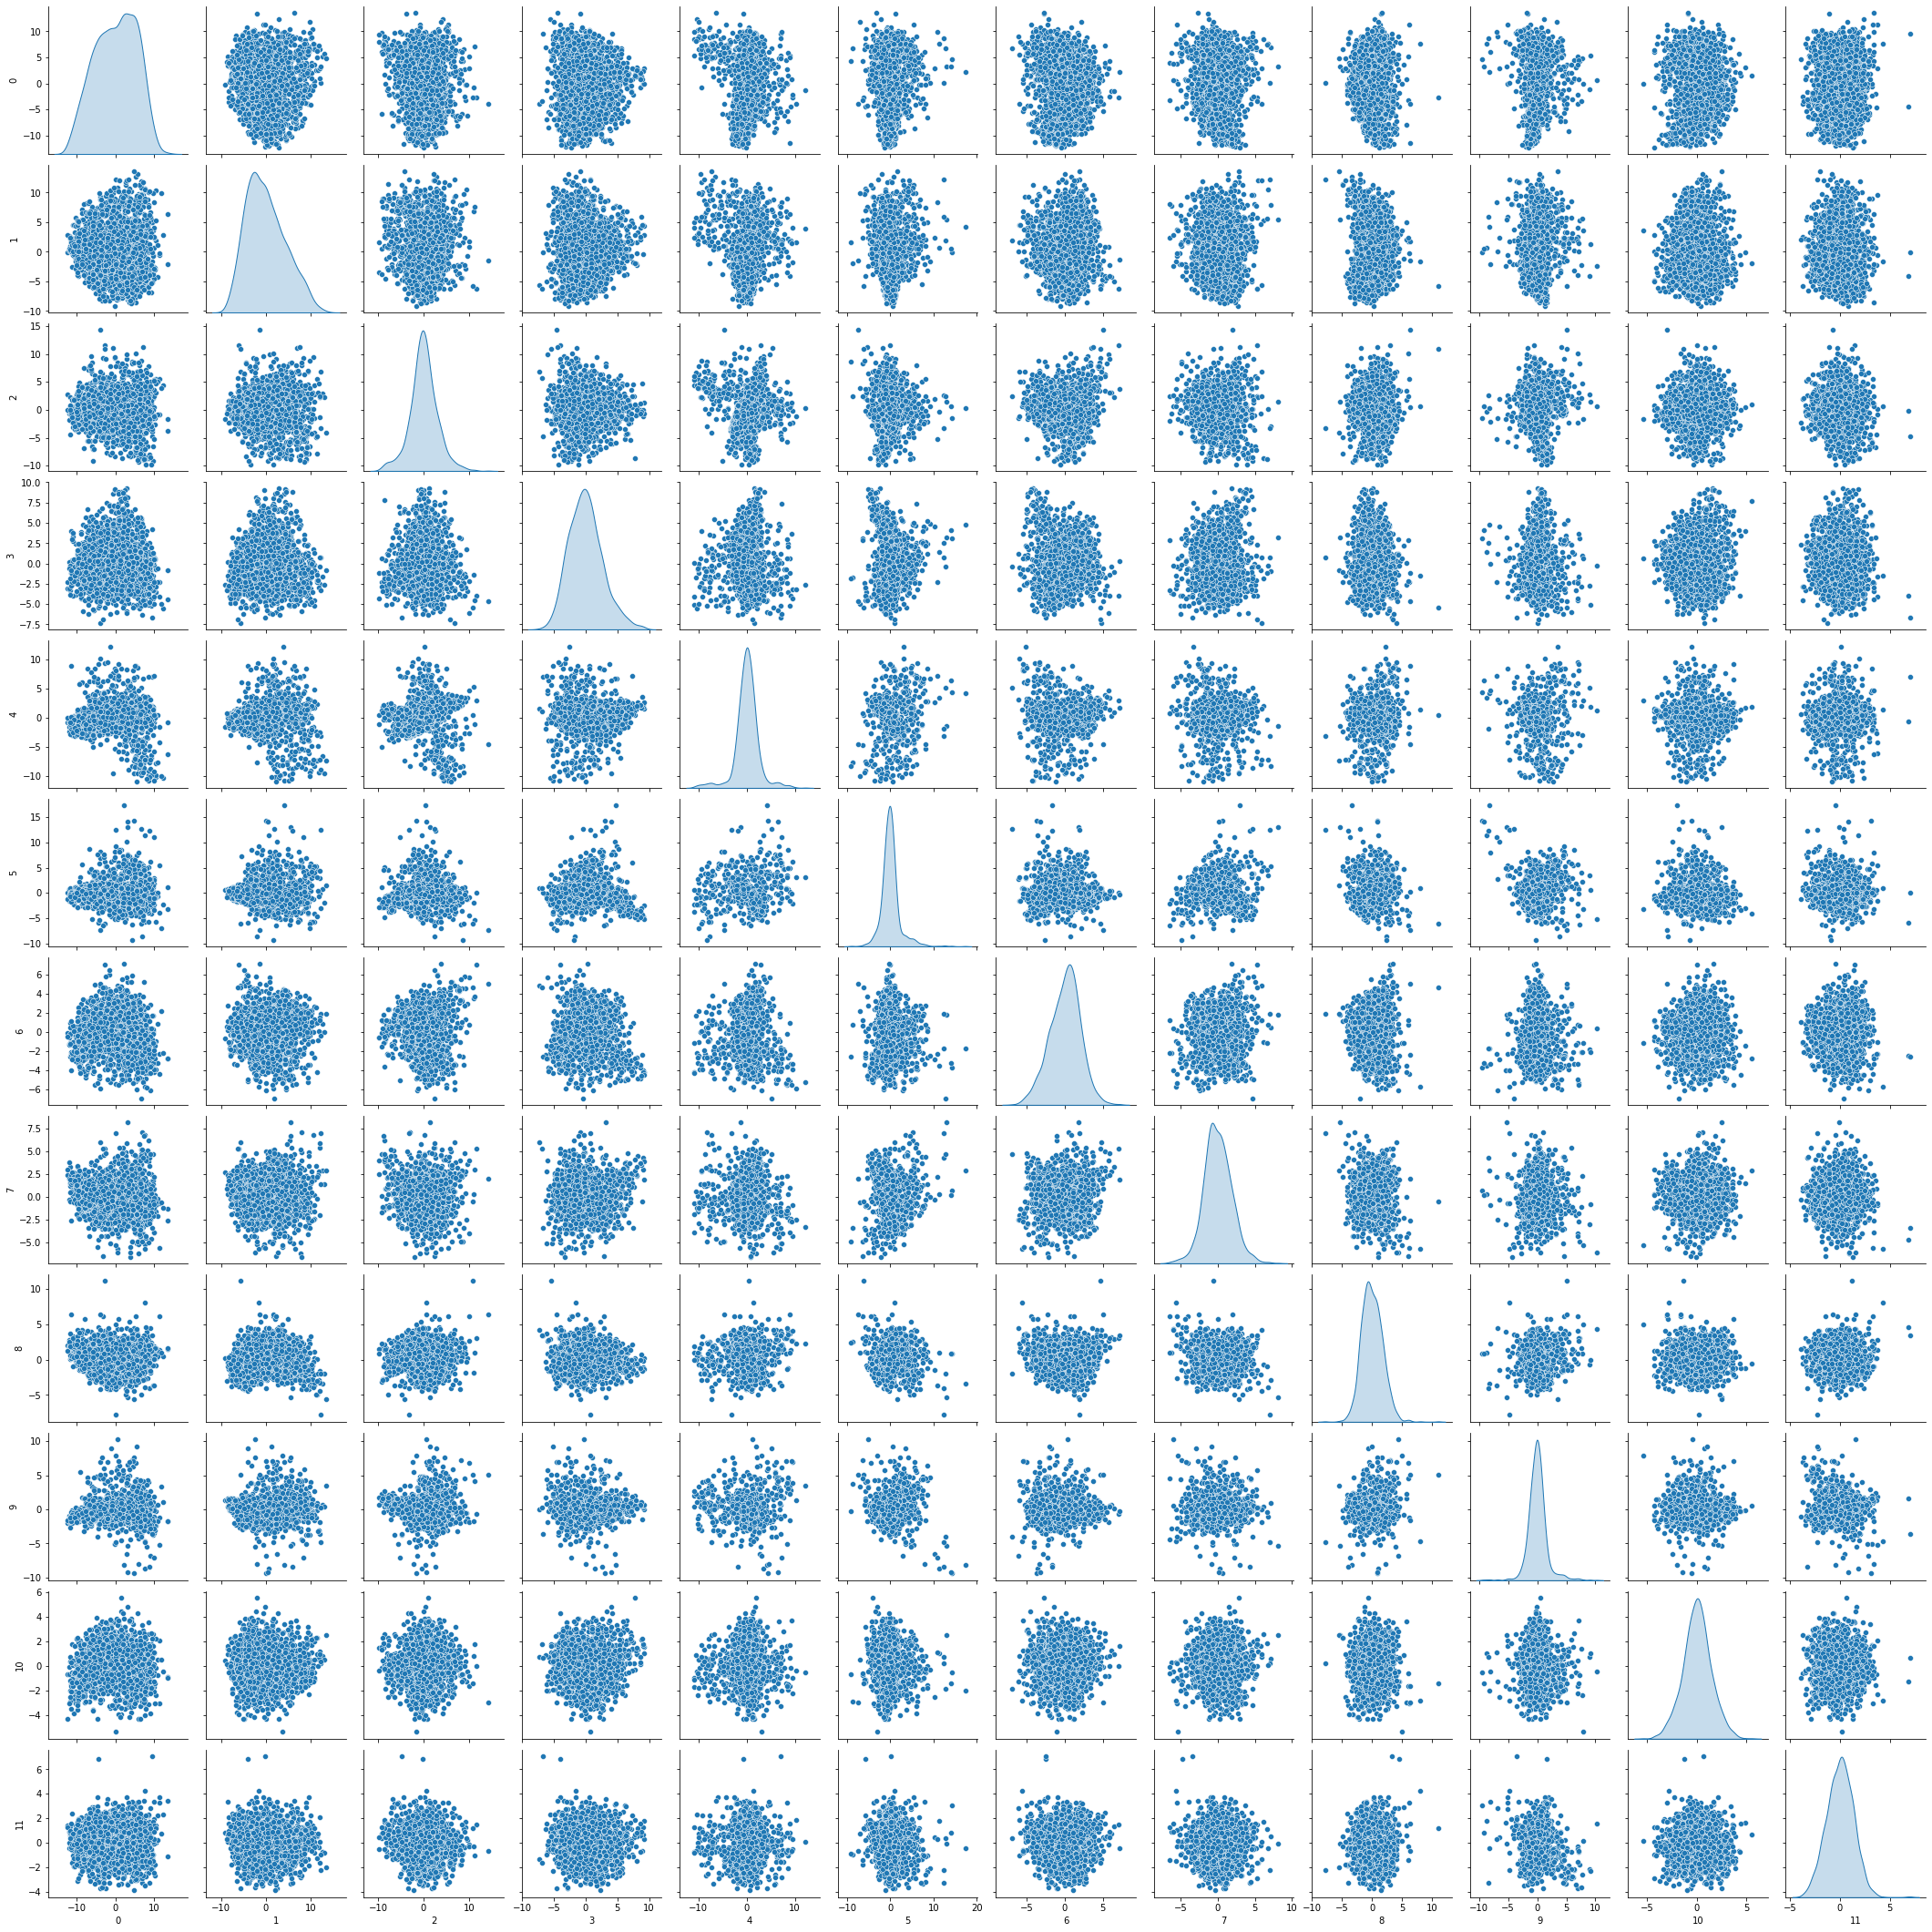

In [11]:
sns.pairplot ( df, diag_kind='kde') ;

#### **Inference**
* Range of K = 2 to 6

### **2.1.2 - Elbow Plot**

In [12]:
from sklearn.cluster import KMeans

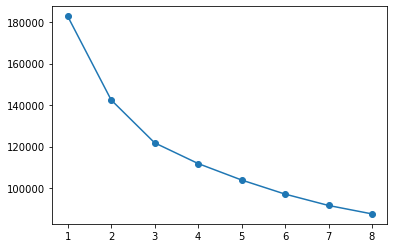

In [13]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,9):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,9)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [14]:
from sklearn.metrics import silhouette_score

In [17]:
scores = []

for k in range (2,9):
    
    KM     =  KMeans (n_clusters=k, random_state=2)
    
    labels =  KM.fit_predict (df)
    
    avg    =  silhouette_score (df, labels)
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [18]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0 )  .head()    .style.hide_index()

### **2.1.4 - Dendrogram**

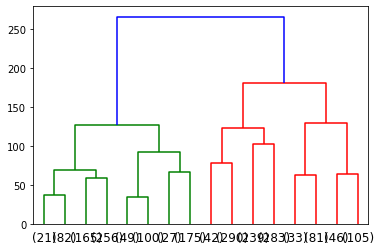

In [19]:
from sklearn.cluster           import  AgglomerativeClustering
from scipy.cluster.hierarchy   import  dendrogram , linkage

agc = AgglomerativeClustering ( affinity ='euclidean' , linkage ='ward')

agc.fit(df)

Z = linkage (df,'ward')

dendrogram ( Z , p=3 , truncate_mode='level')

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2 |         
| Silhouette | 3 |
| Dendrogram | 3 |

In [20]:
KM    =  KMeans ( n_clusters=3 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [21]:
labels = KM.predict(df)

df['cluster'] = labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

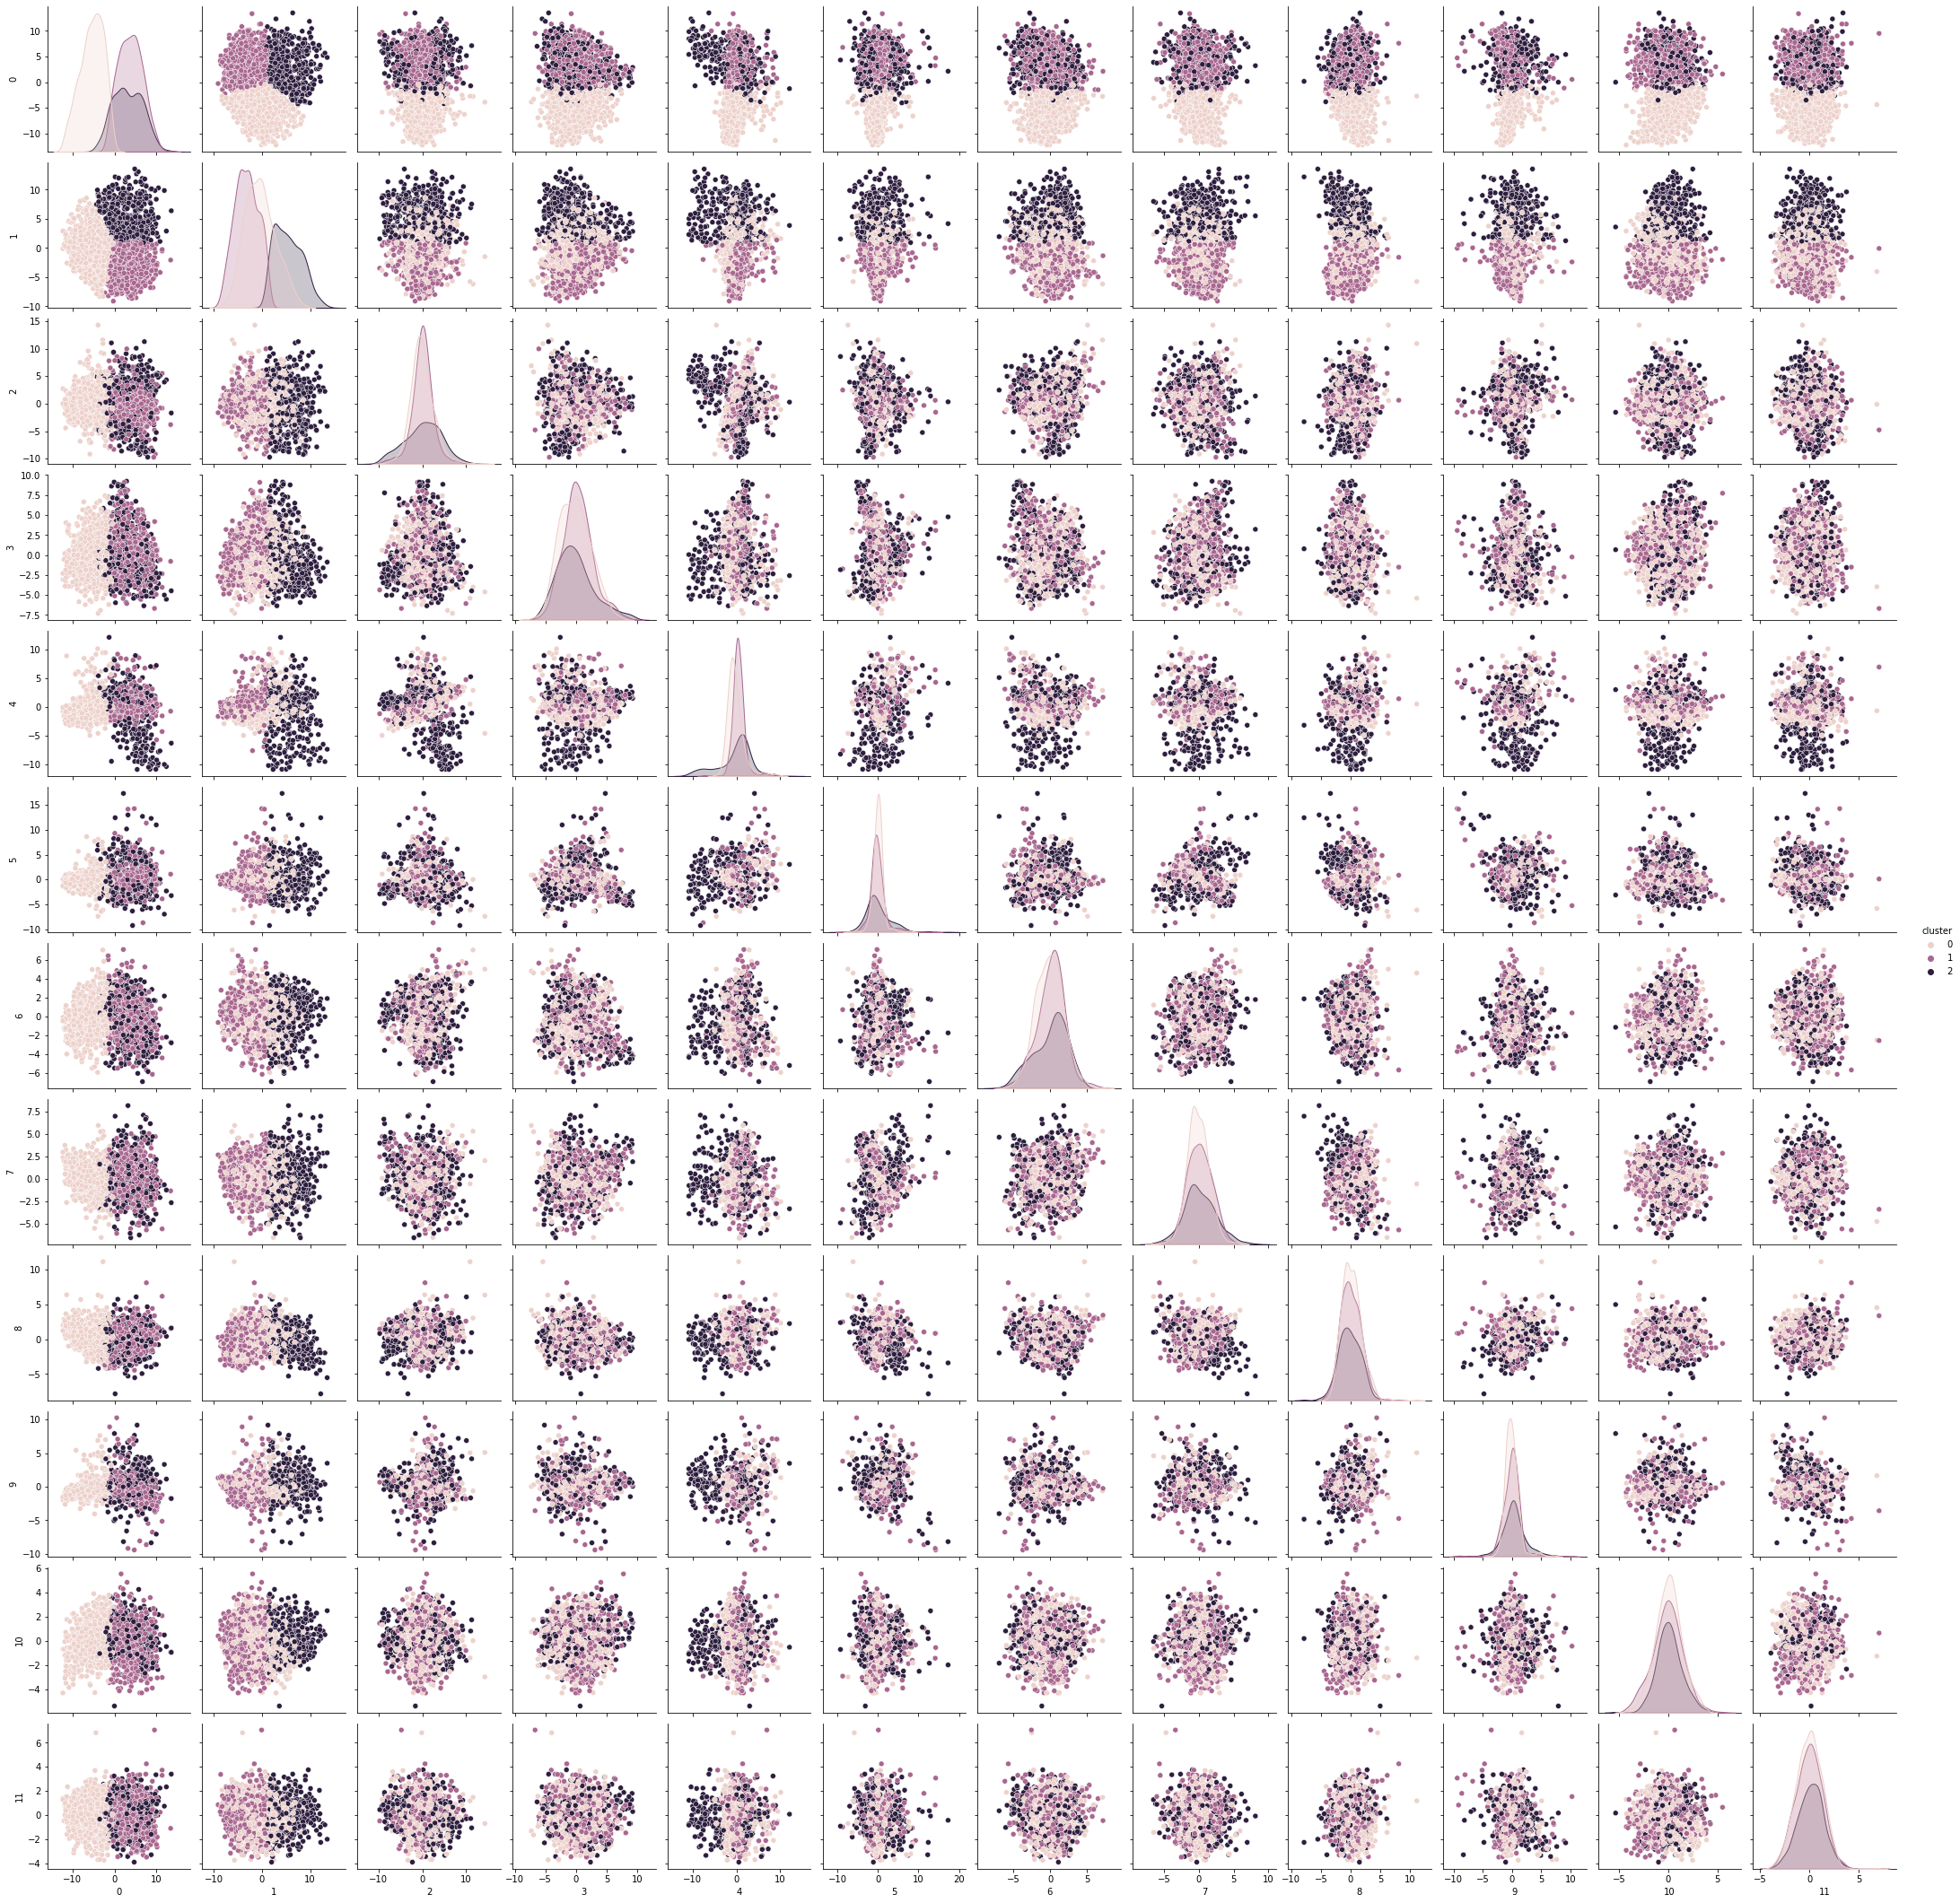

In [23]:
sns.pairplot ( df , diag_kind='kde' , hue='cluster' ) ;

### **2.4.2 - Boxplot**

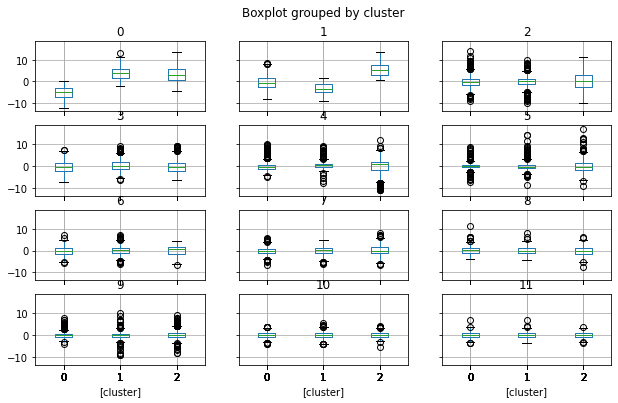

In [24]:
df.boxplot ( by='cluster', figsize=(10,6) )

plt.show()

### **2.4.3 Scatterplot**

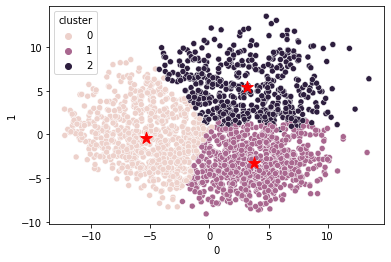

In [25]:
sns.scatterplot ( x= df[0] ,  y = df[1]  ,  hue = 'cluster' , data=df )  

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='red' , marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

There are 3 clusters representing 3 broad categories of countys based on socio-economic , law-enforcement & crime rate

| Label | Signifies |
| ---    | ---    |
| 0  | socio-economic value is low  , law-enforcement is low  , crime-rate is high |         
| 1 | socio-economic value is avg  , law-enforcement is avg  , crime-rate is avg |
| 2 | socio-economic value is high , law-enforcement is high , crime-rate is low |